In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#outliers : aesa data point jo baki k saray data point se alg behvae karta hae.that make the wrong data predictions.
#outliers are nto always dangerous.
#the two things we need to knwo !: when we keep remove the outliers and when we keep outliers.
#wehen we should remove the outliers--->when it is out from the data point like if someboday have age 600 etc.
#Donot need to remove outliers like where we use anomly outliers algorithams.
#bahiutkharab impact jta hae kuch algorithams par jesa k linear regression ,logistic regression edaboost,and deep learning.(in these algoritham we used weight).
#random_forest ,dision tree and other algoritham donot have much impact oon the algoritham.

#How to treat outlier
#1:trimming the outlier or remove from data.-->it is fast.
#2:do limit on the upside and lower side.
#3:treat like missing value and treat them like nan values.
#discretization mean 10-20,20-30,.....90-100.

#How to know outliers.
#if the colum is normally distributed that mean there is no outliers.
#if data is skewed left or right then we do plot bocplot and then 
min=q1-q3(iqr)
max=q1+q3(iqr)
#percentile based approach if data is above 95% and below then 5% are outliers.

#Technique that we use for Outliers
#Zscore treatment
#iQr based filtering
#percentile
#winserization

In [11]:
          # z sCoer outlier detection and removel.(the clumns must be normally distributed or should be close.)

In [29]:
df=pd.read_csv("placement.csv")
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


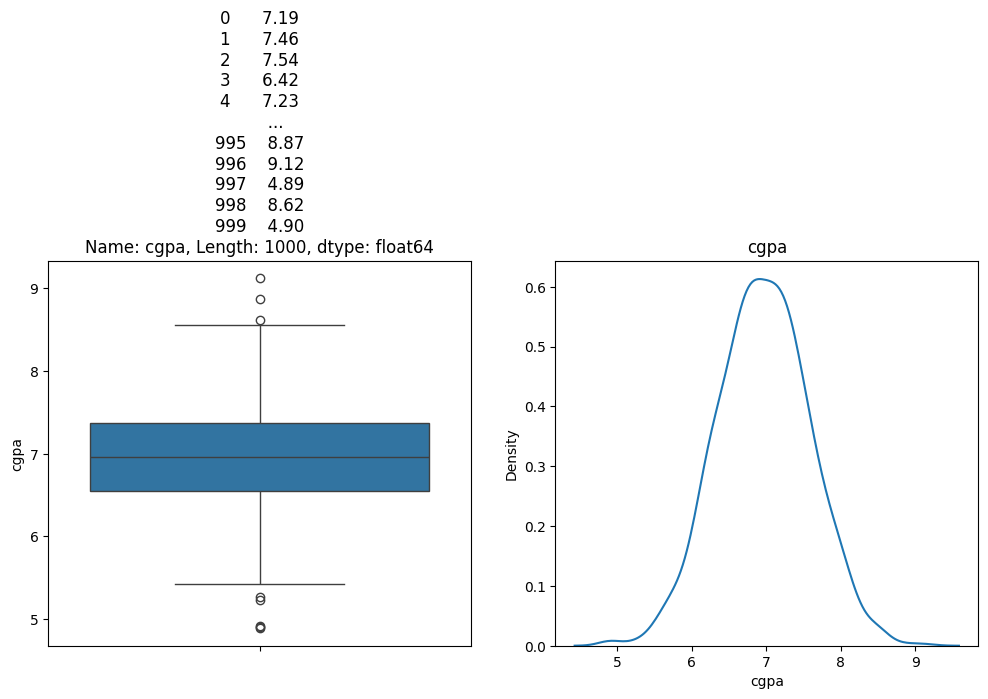

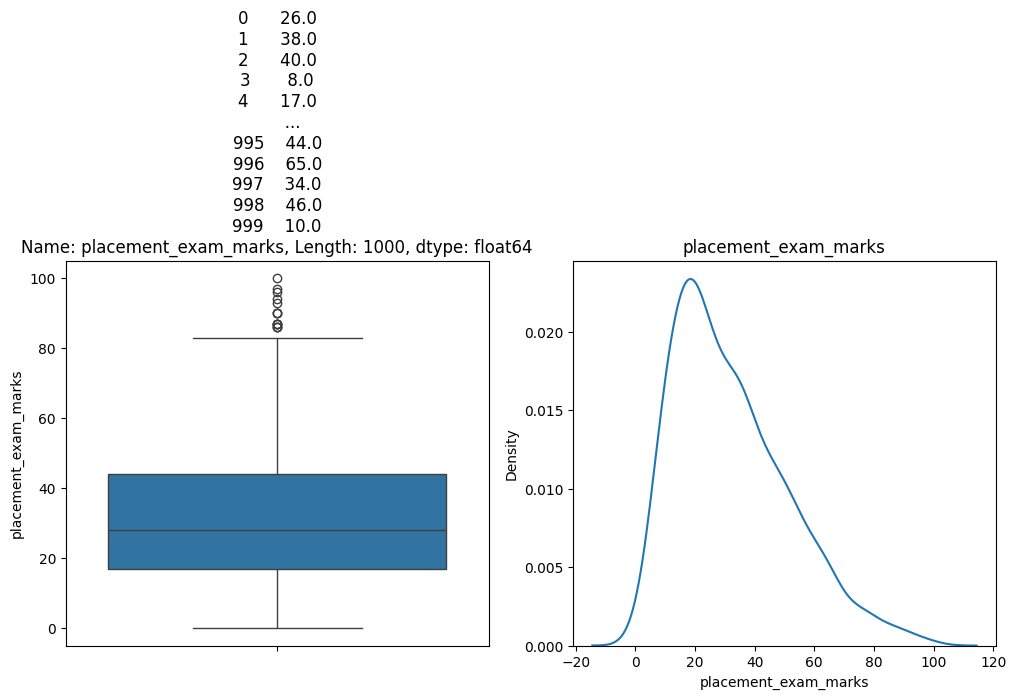

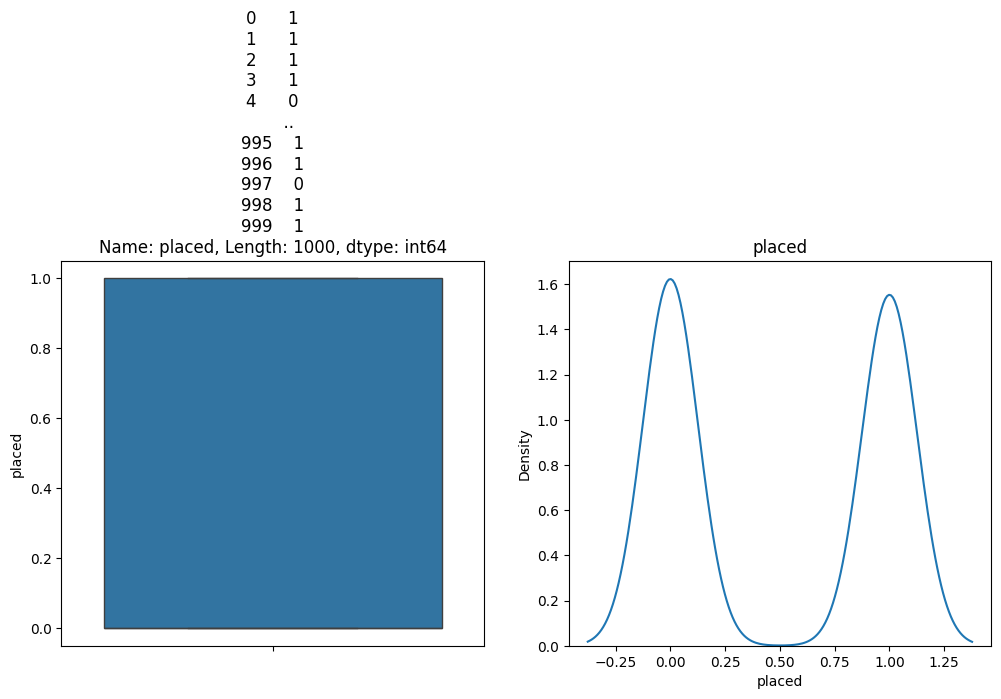

In [34]:
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.boxplot(df[col])
    plt.title(df[col])

    plt.subplot(122)
    sns.kdeplot(df[col])
    plt.title(col)

In [37]:
df.sample(2)

,cgpa,placement_exam_marks,placed
319,7.53,13.0,0
311,6.97,87.0,1


In [47]:
print("The mean of marks",df["cgpa"].mean())
print("The standard deviation of cgpa is:",df["cgpa"].std())
print("The minimum vale of marks",df["cgpa"].min())
print("The maximum vale of marks",df["cgpa"].max())

The mean of marks 6.96124
The standard deviation of cgpa is: 0.6158978751323896
The minimum vale of marks 4.89
The maximum vale of marks 9.12


In [49]:
#fill the boundary values:
print("HIghest_Allowed:",df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest allowed:",df["cgpa"].mean() - 3*df["cgpa"].std())

HIghest_Allowed: 8.808933625397168
Lowest allowed: 5.113546374602832


In [53]:
#Now finding the outliers
df[(df["cgpa"] > 8.80) | (df["cgpa"] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [58]:
#Trimming
new_df=df[(df["cgpa"]<8.80) & (df["cgpa"]>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [67]:
# #Now calculate he xc=score for every value.
# formoula x-mean/std

df["z_score"]=(df["cgpa"]-df["cgpa"].mean()) / df["cgpa"].std()

In [73]:
upper_limit=df[df["z_score"]>3]
df[df["z_score"]<3]

,cgpa,placement_exam_marks,placed,z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [74]:
df=df[(df["z_score"]<3) & (df["z_score"]> -3) ]

In [75]:
df.describe()

,cgpa,placement_exam_marks,placed,z_score
count,995.000000,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437,0.003437
std,0.600082,19.130298,0.500094,0.974320
min,5.230000,0.000000,0.000000,-2.810921
25%,6.550000,17.000000,0.000000,-0.667708
50%,6.960000,28.000000,0.000000,-0.002013
75%,7.365000,44.000000,1.000000,0.655563
max,8.620000,100.000000,1.000000,2.693239


In [76]:
df.shape

(995, 4)

In [86]:
df=pd.read_csv("placement.csv")
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [87]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [88]:
upper_limit=df["cgpa"].mean()+3*df["cgpa"].std()
lower_limit=df["cgpa"].mean()-3*df["cgpa"].std()

In [89]:
df["cgpa"]=np.where(
    df["cgpa"]>upper_limit,
    upper_limit,
    np.where(
    df["cgpa"]<lower_limit,
    lower_limit,
    df["cgpa"]
    
    )
)

In [90]:
df.shape

(1000, 3)

In [91]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000
